In [2]:
import csv 
from collections import Counter
import pandas as pd 
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def read_department_file(filename):
	allstars = {}
	with open(filename, r'U') as input_file:
		program_dept_reader = csv.DictReader(input_file)
		teams = [row['Team'] for row in program_dept_reader]
		allstars = Counter(teams)
		del(allstars[''], allstars['New Jersey Nets'], allstars['Charlotte Bobcats'], allstars['New Orleans Hornets'])
		allstars['Brooklyn Nets'] += 8 #To account for New Jersey Nets all stars
		allstars['Charlotte Hornets'] += 1 #To account for Charlotte Bobcats all stars
		allstars['New Orleans Pelicans'] += 9 #To account for New Orleans Hornets all stars 
	return allstars

In [4]:
def process_student_records(allstars):
    with open('NBAData.csv', 'r') as input_file:
        program_reader = csv.DictReader(input_file)
        with open('masterfile.csv', 'w') as output_file:
            program_writer = csv.DictWriter(output_file,
                                            fieldnames=['Rank','Team', 'Win Percentage', 'Market Size Ranking', 'Ticket', 'All Stars'],
                                            extrasaction='ignore', delimiter=',', quotechar='"')
            program_writer.writeheader()
            for row in program_reader:
            	row['All Stars'] = allstars[row['Team']]
            	program_writer.writerow(row)

In [5]:
a = read_department_file('NBA All Star Games.csv')
b = process_student_records(a)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 'U' mode is deprecated
  app.launch_new_instance()


In [19]:
df=pd.read_csv('masterfile.csv', sep=',', header=0) 

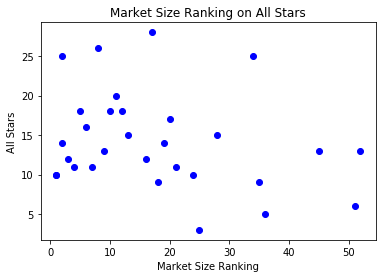

In [29]:
Y = df['All Stars']
X = df['Market Size Ranking']

X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)

plt.scatter(X, Y,  color='blue')
plt.title('Market Size Ranking on All Stars')
plt.xlabel('Market Size Ranking')
plt.ylabel('All Stars')
plt.show()

In [8]:
model = sm.OLS(Y, X).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     20.79
Date:                Mon, 11 Dec 2017   Prob (F-statistic):           8.62e-05
Time:                        20:32:53   Log-Likelihood:                -116.59
No. Observations:                  30   AIC:                             235.2
Df Residuals:                      29   BIC:                             236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4338      0.095      4.559      0.000       0.239       0.628
==============================================================================
Omnibus:                        1.381   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.228
Skew:                          -0.460   Prob(JB):                        0.541
Kurtosis:                       2.633   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

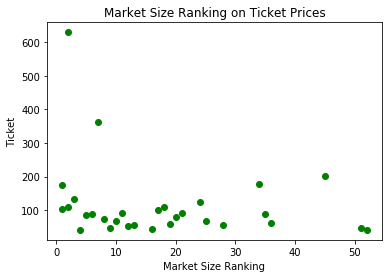

In [9]:
Y_1 = df['Ticket']
X_1 = df['Market Size Ranking']

X_1 = X_1.values.reshape(len(X_1),1)
Y_1 = Y_1.values.reshape(len(Y_1),1)

plt.scatter(X_1, Y_1,  color='green')
plt.title('Market Size Ranking on Ticket Prices')
plt.xlabel('Market Size Ranking')
plt.ylabel('Ticket')
plt.show()

In [10]:
model = sm.OLS(Y_1, X_1).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     7.191
Date:                Mon, 11 Dec 2017   Prob (F-statistic):             0.0120
Time:                        20:32:54   Log-Likelihood:                -192.03
No. Observations:                  30   AIC:                             386.1
Df Residuals:                      29   BIC:                             387.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.1545      1.176      2.682      0.012       0.749       5.560
==============================================================================
Omnibus:                       38.769   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.576
Skew:                           2.660   Prob(JB):                     7.29e-29
Kurtosis:                      11.681   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

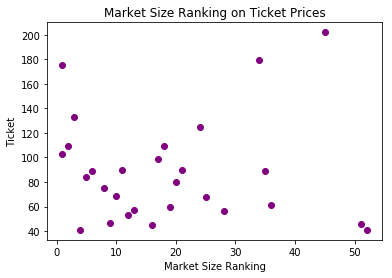

In [11]:
df = df.drop(df.index[28])
df = df.drop(df.index[0])
Y_2 = df['Ticket']
X_2 = df['Market Size Ranking']

plt.scatter(X_2, Y_2,  color='purple')
plt.title('Market Size Ranking on Ticket Prices')
plt.xlabel('Market Size Ranking')
plt.ylabel('Ticket')
plt.show()

In [12]:
model = sm.OLS(Y_2, X_2).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ticket   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     27.68
Date:                Mon, 11 Dec 2017   Prob (F-statistic):           1.51e-05
Time:                        20:32:56   Log-Likelihood:                -158.17
No. Observations:                  28   AIC:                             318.3
Df Residuals:                      27   BIC:                             319.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Market Size Ranking     2.9254      0.556      5.261      0.000       1.785       4.066
==============================================================================
Omnibus:                        2.410   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.117
Skew:                          -0.354   Prob(JB):                        0.572
Kurtosis:                       3.674   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""